# HEART DISEASE REGRESION ANALYSIS 
The purpose of this project is to anaylze health factors that may correlate with heart disease. This will be done by analyzing the factors through a series of different classification techniques. The optimality of the techniques will be evaluated by using them in order to train models to predict the likelihood of a person having heart disease. 

## Background

Data will be a subset of the UCI Heart Disease dataset. This data has been fully supervised by UCI meaning that it's been fully labeled and we can trust the veracity of the labeling.

#### Labels
- **age:** Age in years
- **sex:** (1 = male; 0 = female)
- **cp:** Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
- **cholserum:** Cholestoral in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeakST:** Depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
- **ca:** Number of major vessels (0-4) colored by flourosopy
- **thal:** 1 = normal; 2 = fixed defect; 3 = reversable defect
- **sick:** Indicates the presence of Heart disease (True = Disease; False = No disease)

### Load Important Libraries and Functions

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

#sklearn libraries to train models and check accuracy of models 
from sklearn.model_selection import train_test_split, KFold
from sklearn import model_selection
from sklearn import metrics

#libraries for models/
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#confusion matrix library 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#useful libraries for randomization to create useful data
import os
import random

#set a seed for consistent results 
random.seed(8)

In [65]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, y_hat, title_name="Confusion Matrix"):
    '''Draws a confusion matrix for the given target and predictions'''
    cm = metrics.confusion_matrix(y, y_hat)
    metrics.ConfusionMatrixDisplay(cm).plot()
    plt.title(title_name)

## Load Data and First Impressions

In [66]:
df = pd.read_csv('heartdisease.csv')

In [67]:
#use dataframe function head() to view first few lines of dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


### Notes
Right now the values seem to be separated between sick and not sick (with all the not sick values first and then sick values at the end). With the goal of testing classification techiques, the sick value needs to be evenly distributed through the dataset in order to provide an accurate sample. 

In [68]:
#use dataframe function describe() to get basic info about each column in dataframe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [69]:
#use dataframe function info() to get count and type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Notes
Looking at the types of data, they all seem to be similar except for the "sick" column in the sense that "sick" is boolean while the other ones are numeric. The learning methods we will be using later on will rely on numeric inputs. Therefore the int and float types will be fine but we need change the bool values as the learning methods may not be able to use infomation in this column and waste this data. Also the "sick" column is the most crucial column so we need to preserve the data to be able to use it.



In [70]:
'''
In this code block, we first recode the sick column in order to be able use it in the same way as the other columns and then we shuffle
the data so that we do not have a list that distinguishes between the sick and not sick patients.
'''

#convert sick column from boolean to numeric (0 for False and 1 for True)
recode = { True : 1, False : 0 }
df['sick'] = df['sick'].map(recode) 

#shuffle the dataframe
from sklearn.utils import shuffle
df = shuffle(df)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,0
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,0


### Examine Data 
Next we will examine the data and see what information we may be able to find from just looking at each column alone. Note that we will need to separate the data for the "sick" column as it is what we will be trying to predict later on. We will be observing the other information to see if anything will be able to help us correlate a certain factor with and sickness. 

For the obseveration we will be plotting the data as histograms. With the histograms we will be able to see how the data groups up. We will note if they are either 
1) binary (two choices for the data)
2) limited selection (data falls into small number buckets)
3) gradient (data is dispersed across a range)


In [71]:
#separate sick data from data frame
y = df['sick']
x = df.drop(['sick'], axis = 1)

#plot data in x as histograms 
def histogram(col):
    plt.figure(figsize=(5,3))
    plt.hist(x[col])
    plt.title(col)
    plt.show()

#track each type of data 
binary = []
selection = []
gradient = []

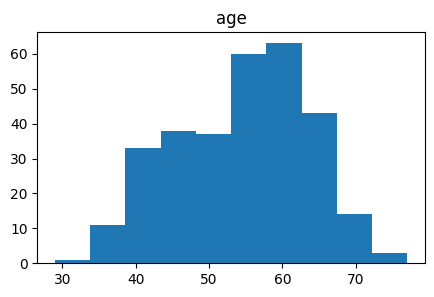

In [72]:
histogram('age')  #gradient (seems to be a normal curve skewed slightly to the left)

In [73]:
gradient.append('age')

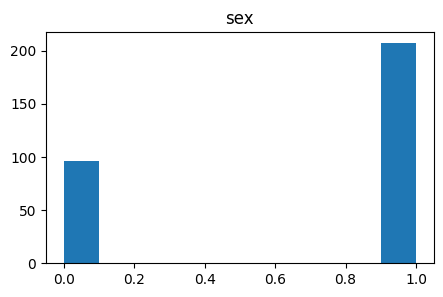

In [74]:
histogram('sex') #binary

In [75]:
binary.append('sex')

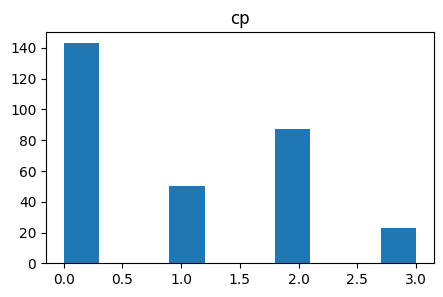

In [76]:
histogram('cp') #limited selection (classisfication with 4 classes)

In [77]:
selection.append('cp')

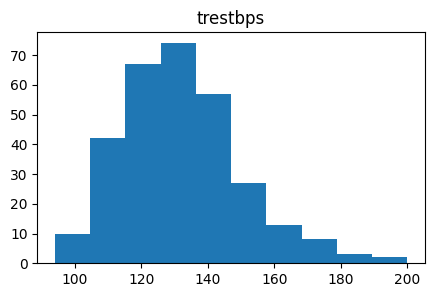

In [78]:
histogram('trestbps') #gradient (bell curve with right skew)

In [79]:
gradient.append('trestbps')

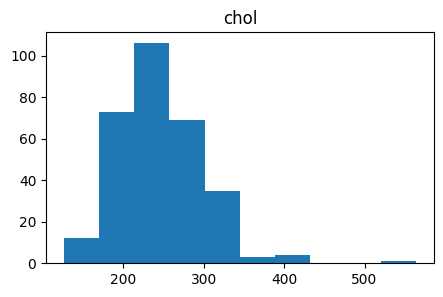

In [80]:
histogram('chol') #gradient (bell curve with right skew)

In [81]:
gradient.append('chol')

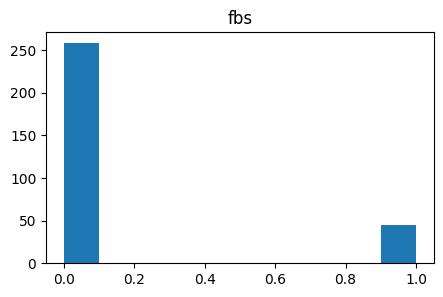

In [82]:
histogram('fbs') #binary 

In [83]:
binary.append('fbs')

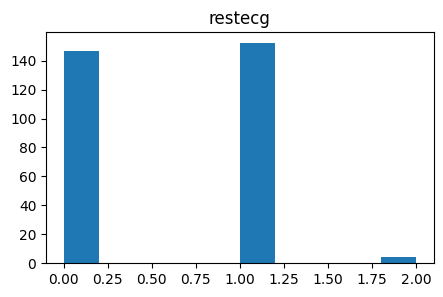

In [84]:
histogram('restecg') #selection with 3 classes

In [85]:
selection.append('restecg')

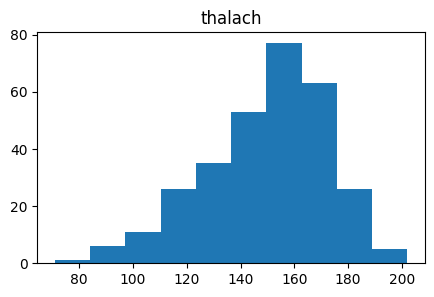

In [86]:
histogram('thalach') #gradient (bell curve with left skew)

In [87]:
gradient.append('thalach')

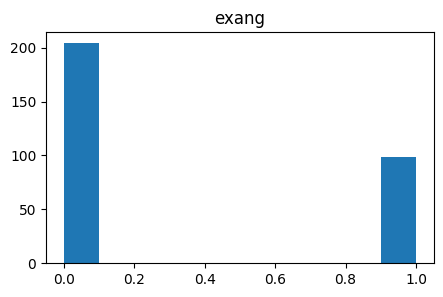

In [88]:
histogram('exang') #binary

In [89]:
binary.append('exang')

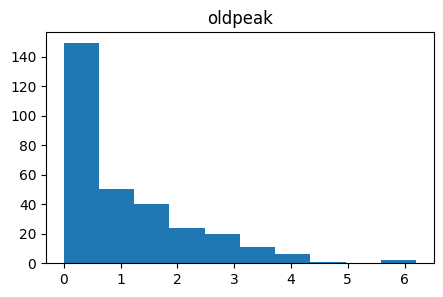

In [90]:
histogram('oldpeak') #gradient (exponential decrease)

In [91]:
gradient.append('oldpeak')

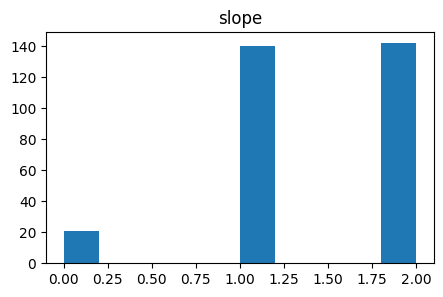

In [92]:
histogram('slope') #selection with 3 classes

In [93]:
selection.append('slope')

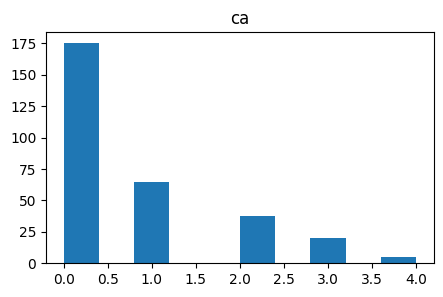

In [94]:
histogram('ca') #selection with 5 classes

In [95]:
selection.append('ca')

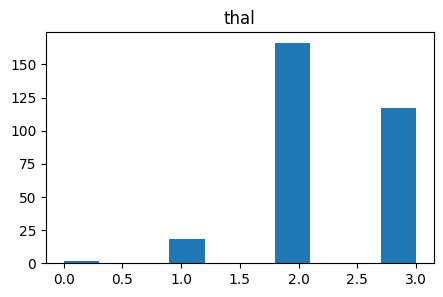

In [96]:
histogram('thal') #selection with 4 classes

In [97]:
selection.append('thal')

In [98]:
selection

['cp', 'restecg', 'slope', 'ca', 'thal']

In [99]:
binary

['sex', 'fbs', 'exang']

In [100]:
gradient

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Notes
From the binary, selection, and gradient arrays, we are able to see how the what type of data is displayed in with each health factor. When we compare this to the labels that were given to us, the information is consistent. Knowing the classification of the data will allow us to know how we might want to proceed with processing the data. For example, we may use a standard scaler or one hot encoding and depending on the classification of the data, one may be better suited than the other

In [101]:
#way to categorize with code instead of manually looking 
def type(data, max_selection):
    hmap = dict()
    for num in data:
        hmap[num] = hmap.get(num, 0) + 1
    if len(hmap) == 2: 
        return 'binary'
    elif len(hmap) <= max_selection:
        return 'selection'
    else:
        return 'gradient'

b = []
s = []
g = []
selection_threshold = 5

for col in x:
    class_type = type(x[col], selection_threshold)
    if class_type == 'binary':
        b.append(col)
    elif class_type == 'selection':
        s.append(col)
    elif class_type == 'gradient':
        g.append(col)

print('binary: ', b)
print('selection: ' , s)
print('gradient: ', g)

binary:  ['sex', 'fbs', 'exang']
selection:  ['cp', 'restecg', 'slope', 'ca', 'thal']
gradient:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


### Notes
This was a sanity check done in order to be able to check the classfication of each factor. While we are able to do this manually for this set of data, if we were using a data set with more factors we may not be able to do this manually. Also this may be more effcient than checking manually and less prone to errors.

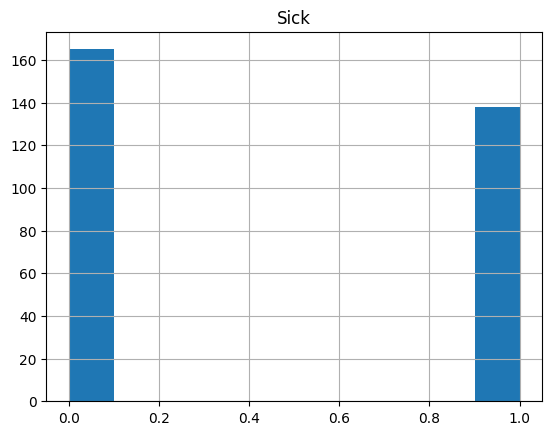

Amount of Sick Participants:  138
Amount of Not Sick Participants:  165


In [102]:
y.hist()
plt.title("Sick")
plt.show()

my_list = y.tolist()
not_sick = my_list.count(0)
is_sick = my_list.count(1)

print('Amount of Sick Participants: ', is_sick)
print('Amount of Not Sick Participants: ', not_sick)

### Notes

Looking at the amount of sick people to healthy people, we seem to have a fairly balanced group with plenty on both sides. Having a decent mix is important as we need to able to see what factors may cause someone to be sick as compared to healthy. If the data only had sick people, all the data would point to the factors inidicating illness at the same magnitude and vice versa. With a mix of people, we are able to see both which factors can be indicators as well as which groups of factors may show the strongest correlation of illness. 

<Axes: >

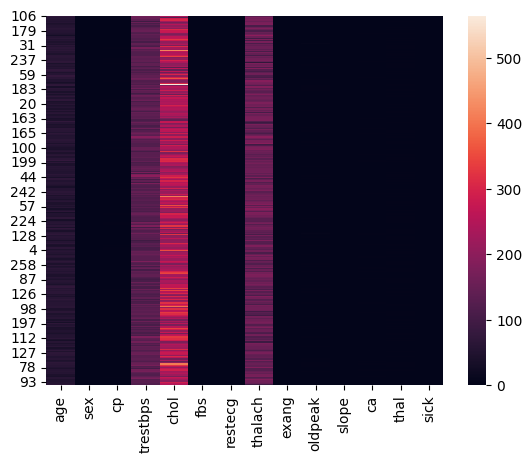

In [103]:
sns.heatmap(df)

In [104]:
#using a correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,-0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,0.430696


### Notes
As we look at correlation matrix, we are able to see what types of factor seem to indicate heart disease.

There seem to be strong inverse correlations to sickness with chest pain type (cp) and maximum heart rate achieved and maximium heart rate achieved (thalach). These two factors showing a strong inverse correlation seems to make sense intuitively. As the heart is located in the heart and pain is a signal from the body that attention is needed, a lack of chest pain is a positive sign typically showing that a person is healthy. Similarly a higher maximum heart rate achieved indicates a healthy heart rather than sickness. 

Then we have factors exercise induced angina (exang) and depression induced by exercise (oldpeak) having strong direct correlations. Angina is a medical term used to refer to heart pain or discomfort that occurs when part of your heart muscle does not get enough oxygen-rich blood. Having chest pain induced by excercise indicates that the heart is unable to perform at higher capacities and indicates possible illness. Similarly depression induced by exercise may lead someone not to excercise. As excercise is important to cardiovasular health depression induced by excercise can understandly lead to heart problems. Another factor with a strong direct correlation is the number of major vessel colored by a flouroscopy (ca). With fluoroscopy, doctors aim to see the movement of blood through the vessels in the heart. If a vessel is not performing well or is blocked will be indicated by the fluoroscopy. A higher number of weak or blocked blood vessels shows worse heart health and therefore may be an indicator of heart disease. 



## __Prep Data__ 

With this section, we aim to process the data so that we are able to draw out more accurate information about the data. We have three types of data as it seems (binary, selection, and gradient). For our binary and selection data, we will be opting to use One Hot Encoding in order to bring more dimension to the data. Adding more dimension to the data will allow the model to have more information to learn from and ultimately be more accurate when learning from the data. For our gradient data, we will be using a standard scaler. The standard scaler removes the mean and scales each feature/variable to unit variance. In the context finding what factors lead to heart disease, outliers heavily skewing our data may be deterimental as the information is to be applied to a general population. 

Something we need to note is that when we split the data, we need to use a random state so that we are able to accurately reproduce splits to be used on different algorithms. As we are currently seeing what algorithms are most optimal, we need to be have accurate splits.

In [105]:
#dropping the sick column 
y = df['sick']
x = df.drop(['sick'], axis = 1)

#split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 8)

#dimensions of the test and training data
print('training data shapes:', X_train.shape, y_train.shape)
print('test data shapes:', X_test.shape, y_test.shape)

training data shapes: (242, 13) (242,)
test data shapes: (61, 13) (61,)


### Building Our Pipeline

In [106]:
#libraries to build our pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

#categorize data to be processed 
categorical_features = selection + binary
numerical_features = gradient

#build pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = OneHotEncoder(categories='auto', handle_unknown='ignore')

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features),
    ])

#put data through pipeline
x_pipelined = full_pipeline.fit_transform(x)

In [107]:
#split data
xtrain, xtest, ytrain, ytest = train_test_split(x_pipelined, y, test_size = 0.2, random_state = 8)

#seeing shapes for sanity check
print('training data shapes:', xtrain.shape, ytrain.shape)
print('test data shapes:', xtest.shape, ytest.shape)

training data shapes: (242, 30) (242,)
test data shapes: (61, 30) (61,)


## __Classifiers__

In this next section, we will be working wiht different classifiers in order to see how well they are able to predict if a person may be sick or healthy. We will be going through a few different classifers and then seeing what we can do in order to optimize them. 

### Metrics

The metrics we will be using to determine the performance of a model will include accuracy, precisio, recall, and F1.

The accuracy, precision, recall, and F1 score are all methods of assessing the performance of a model with each slightly differing in how they are calculated. 

    Note: 
    - TP: true positive
    - FP: false positve
    - TN: true negative
    - FN: false negative 
  
 

The accuracy is a measurement of the number of correct predictions the model has made. 
It is calculated with the equation:
    
    accuracy = (TP + TN) / (TP + FP + TN + FN) 
The accuracy is important as it allows us to see how correct our is. Generally we would want to use the accuracy score as a factor in measuring performance as it is generally easy to understand. If the accuracy is high, then we would generally want to use this factor for assessment. 

<br>

The precision is the number of positive predicitons that belong to the postive class.
It is calculated by the equation:
    
    precision = TP / (TP + FP)
The precssion will check proportions of correct positive identificaitons as it is the ratio of correct positives to the total numbers of positives. It is also directly related the amount of false positives in the data.


<br>

The recall is how good a test is at detecting the postives.
It is generated with the equation:
   
    recall = TP / (TP + FN) 
   
The recall is will check the model to see if it overlooking positives by checking the false negatives. As it is the ratio of predicted positives to all positives, it can be used to make sure we are not neglecting data that is wrong. 

<br>

The F1 score aims to minimize error perfomance in general. The score is a weighted average of the precision and recall.  
It is calcuated by the equation:
   
    F1 = (2 * (recall * precision)) / (recall + precision)
    
The F1 score is a balance between the recall and precision equations. By using both the precision and recall, it accounts for both the errors looked at in the recall and precision. 
    
<br>

Generally we would want to use the accuracy score when the true positives and true negatives are the most prevalent values in our confusion matrix. We would use the F1 score if the false positives and the false negatives are the most prevalent values. Then if false positives are the most significant values, then we would want to use the precision. If the false negatives are the most abundant values.

In [108]:
def scores(model, xtrain, xtest, ytrain, ytest, model_name):
    #train model 
    model.fit(xtrain, ytrain) 

    #predictions 
    train_prediction = model.predict(xtrain)
    test_prediction = model.predict(xtest)

    #accuracy score 
    train_accuracy = metrics.accuracy_score(ytrain, train_prediction)
    test_accuracy = metrics.accuracy_score(ytest, test_prediction) 

    #precision score
    train_precision = metrics.precision_score(ytrain, train_prediction)
    test_precision = metrics.precision_score(ytest, test_prediction)

    #recall score
    train_recall = metrics.recall_score(ytrain, train_prediction)
    test_recall = metrics.recall_score(ytest, test_prediction) 

    #f1 score 
    train_f1 = metrics.f1_score(ytrain, train_prediction)
    test_f1 = metrics.f1_score(ytest, test_prediction) 

    #build pandas df to display data
    data = {
        'Training' : [train_accuracy, train_precision, train_recall, train_f1],
        'Testing' : [test_accuracy, test_precision, test_recall, test_f1]
    }
    
    df = pd.DataFrame(data, index=['Accuracy Score', 
                               'Precision Score', 
                               'Recall Score', 
                               'F1 Score'])
    df.columns.name = model_name

    return df

In [109]:
#confusion matrix
def matrix(model, xtrain, xtest, ytrain, ytest, model_name):
    #train model 
    model.fit(xtrain, ytrain) 

    #predictions for matrix
    predictions = model.predict(xtest)

    #generate confusion matrix
    cm = confusion_matrix(ytest, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    #display confusion matrix
    disp.plot(cmap = 'Blues')
    fig = disp.figure_
    fig.set_figwidth(4)
    fig.set_figheight(4) 
    plt.title(model_name + ' confusion matrix')
    plt.show()

### K-Nearest Neighbors
The first classifier we are going to use to K-Nearest Neighbors (knn). The KNN classifier operates by finding the k nearest neighbors to a given data point, and it takes the majority vote to classify the data point. 

In [110]:
#knn model
knn = KNeighborsClassifier()
knn_scores = scores(knn, xtrain, xtest, ytrain, ytest, 'KNN')
knn_scores

KNN,Training,Testing
Accuracy Score,0.884298,0.852459
Precision Score,0.880734,0.875000
Recall Score,0.864865,0.777778
F1 Score,0.872727,0.823529


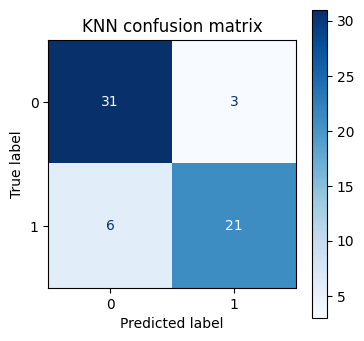

In [111]:
matrix(knn, xtrain, xtest, ytrain, ytest, 'KNN')

### Logistic Regression
Next we will be looking at using a logisitc regression model. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. This model works well with our goal as we are aiming to determine whether a person is sick or healthy. 

In [112]:
lr = LogisticRegression()
lr_scores = scores(lr, xtrain, xtest, ytrain, ytest, 'Logistic Regression')
lr_scores

Logistic Regression,Training,Testing
Accuracy Score,0.876033,0.885246
Precision Score,0.885714,0.884615
Recall Score,0.837838,0.851852
F1 Score,0.861111,0.867925


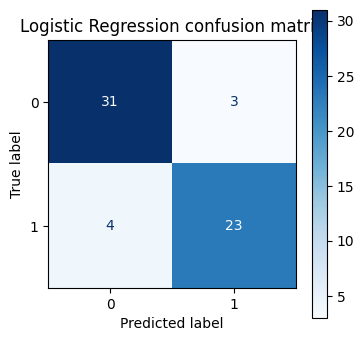

In [113]:
matrix(lr, xtrain, xtest, ytrain, ytest, 'Logistic Regression')

### Gaussian Naive Bayes

The next model will be trained with a navies bayes algorithm, and in this case we will be using a Gaussian version. The algorithm works by being able to analyze features of the model independently. This means a modificaiton of one feature will not have an effect on the other features within the algorithm. The gaussian aspect of the model works to implement a normal distribution for our data.

In [114]:
gnb = GaussianNB()
gnb_scores = scores(gnb, xtrain, xtest, ytrain, ytest, 'Gaussian Naive Bayes')
gnb_scores

Gaussian Naive Bayes,Training,Testing
Accuracy Score,0.830579,0.868852
Precision Score,0.830189,0.851852
Recall Score,0.792793,0.851852
F1 Score,0.811060,0.851852


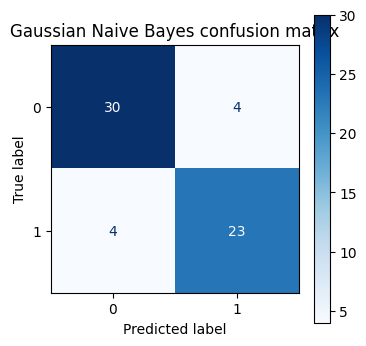

In [115]:
matrix(gnb, xtrain, xtest, ytrain, ytest, 'Gaussian Naive Bayes')

### Support Vector Machine
Lastly, we will be using a support vector machine to train our model. A support vector machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In 2-D space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [116]:
svm = SVC()
svm_scores = scores(svm, xtrain, xtest, ytrain, ytest, 'Support Vector Machine')
svm_scores

Support Vector Machine,Training,Testing
Accuracy Score,0.925620,0.868852
Precision Score,0.934579,0.880000
Recall Score,0.900901,0.814815
F1 Score,0.917431,0.846154


## Applying the Classifiers
In this next part, we will be using the classifiers to find the best combination of 3 characteristics to help indicate whether or not a person has heart disease.

In [117]:
from itertools import combinations, product
from sksurv.preprocessing import OneHotEncoder
cols = list(x.columns)
combos = list(combinations(cols, 3))

#classisfers
classifiers = [
    [KNeighborsClassifier(), 'KNN'],
    [LogisticRegression(), 'Logistic Regression'],
    [GaussianNB(), 'Gaussian Naives Bayes'],
    [SVC(), 'Support Vector Machine']
    
]

all_scores = []

for combo in combos: 
    #dataframe with current features 
    temp = x[[col for col in combo]]


    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

    cat_pipeline = OneHotEncoder()

    #pipeline for current features 
    num_features = [feature for feature in combo if feature in numerical_features]
    cat_features = [feature for feature in combo if feature in categorical_features]

    temp_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_features),
            ("cat", cat_pipeline, cat_features),
        ])
    x_piped = temp_pipeline.fit_transform(temp)
    x_train, x_test, y_train, y_test = train_test_split(x_piped, y, test_size = 0.2, random_state = 8)

    for classifier in classifiers:
        classifier_algo = classifier[0]
        classifier_name = classifier[1]
     
        classifier_score = scores(classifier_algo, x_train, x_test, y_train, y_test, classifier_name)

        all_scores.append([combo, classifier_name,classifier_score['Testing']['Accuracy Score']] )


In [118]:
#convert into data frame
df = pd.DataFrame(all_scores , columns = ['Combo', 'Classifier', 'Accuracy Score'])
df.head(12)

,Combo,Classifier,Accuracy Score
0,"(age, sex, cp)",KNN,0.754098
1,"(age, sex, cp)",Logistic Regression,0.737705
2,"(age, sex, cp)",Gaussian Naives Bayes,0.704918
3,"(age, sex, cp)",Support Vector Machine,0.852459
4,"(age, sex, trestbps)",KNN,0.606557
5,"(age, sex, trestbps)",Logistic Regression,0.622951
6,"(age, sex, trestbps)",Gaussian Naives Bayes,0.606557
7,"(age, sex, trestbps)",Support Vector Machine,0.606557
8,"(age, sex, chol)",KNN,0.540984
9,"(age, sex, chol)",Logistic Regression,0.573770


In [136]:
#find average score across all classifiers 
temp = df
temp = df.drop(['Classifier'], axis = 1)
temp = temp.groupby('Combo').mean()
temp = temp.sort_values(by = ['Accuracy Score'], ascending = False)
temp.head()

,Accuracy Score
Combo,
"(cp, exang, ca)",0.889344
"(cp, restecg, exang)",0.881148
"(exang, ca, thal)",0.877049
"(cp, thalach, ca)",0.864754
"(cp, ca, thal)",0.860656


In [141]:
temp = df
temp = temp.sort_values(by = ['Accuracy Score'], ascending = False)
temp.head(20)

,Combo,Classifier,Accuracy Score
633,"(cp, exang, ca)",Logistic Regression,0.934426
634,"(cp, exang, ca)",Gaussian Naives Bayes,0.918033
1126,"(exang, ca, thal)",Gaussian Naives Bayes,0.901639
285,"(sex, cp, exang)",Logistic Regression,0.901639
286,"(sex, cp, exang)",Gaussian Naives Bayes,0.901639
638,"(cp, exang, thal)",Gaussian Naives Bayes,0.901639
635,"(cp, exang, ca)",Support Vector Machine,0.901639
234,"(age, exang, ca)",Gaussian Naives Bayes,0.901639
585,"(cp, restecg, exang)",Logistic Regression,0.901639
545,"(cp, chol, ca)",Logistic Regression,0.901639


In [142]:
temp = temp.drop(['Classifier'], axis = 1)

In [146]:
temp.groupby('Combo')['Accuracy Score'].mean().to_frame().sort_values(by = 'Accuracy Score', ascending = False).head()

,Accuracy Score
Combo,
"(cp, exang, ca)",0.889344
"(cp, restecg, exang)",0.881148
"(exang, ca, thal)",0.877049
"(cp, thalach, ca)",0.864754
"(cp, ca, thal)",0.860656


## Results

From this we can see that the (cp, exang, ca) combo is most accurate for predicting whether or not a person will have heart disease. Looking back these are the meaning for those variables 
- cp: Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- ca: Number of major vessels (0-4) colored by flourosopy
- exang: Exercise induced angina (1 = yes; 0 = no)

With this in mind, we can see that these factors could be good indicators as the number of vessels exposed can show the functionality of the vessels in the heart with chest pain and exercise induced angina are also closely related with heart function.